In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os.path
# Local Modules
from helpers.load import load_interventions, load_aggregated, load_topics, load_pca
from helpers.vars import codes, helper_langs, interventions_helper, int_c, int_ls
from helpers.plot import set_size, plot_dates, plot_intervention, plot_cumm_diff
from helpers.pca import get_attention_shift_ts 

In [3]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# fontpath = os.path.expanduser('~/LinLibertine_DRah.ttf')
# prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
#     'font.family': 'Linux Libertine Display',
    'text.usetex': True
}

mpl.rcParams.update(params)

## Loads Data

In [4]:
interventions = load_interventions("../data/interventions.csv")
topics_df, topics = load_topics('../data/topics_linked.csv.xz')
agg = load_aggregated("../data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
dfs_pca_shift = load_pca(codes_order, pca_folder="../data/pca/")

## Plots Figure

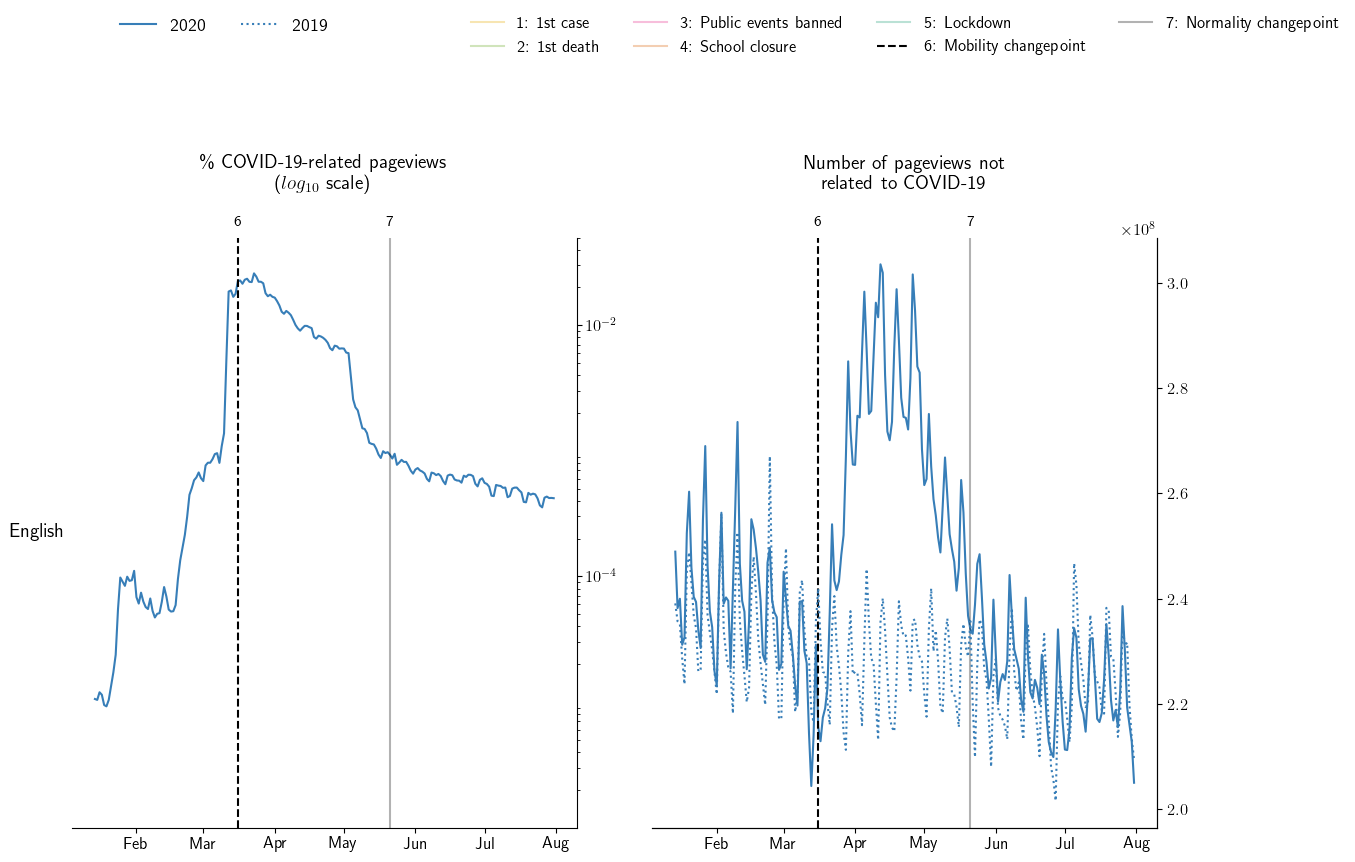

In [27]:
# COVID-RELATED PAGEVIEWS
idx =3
fig, axs = plt.subplots(1, 2,
                       figsize=(14, 10),
                       sharex=False,
                       gridspec_kw={"hspace": 0.9, "wspace": 0.15, "top": 0.7})

ax = axs[0]
code = codes_order[idx]
ax.set_ylabel(helper_langs[code], rotation=0, ha="right", va="center", fontsize=14)
start, end = plot_dates(ax, 20200114, 20200731, 
                        agg[code]["sum"].index,
                        (agg[code]["covid"]["sum"].values + agg[code + ".m"]["covid"]["sum"].values +1) 
                        / (agg[code]["sum"].values + agg[code+".m"]["sum"].values),  sci=False, color="#377eb8")

plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('right')
ax.set_yscale("log")
ax.set_ylim([10**(-6), 5* 10**(-2)])
ax.set_yticks([10**(-4), 10**(-2)])

# NON COVID-RELATED PAGEVIEWS

ax = axs[1]

ax_twin = ax.twiny()

start, end = plot_dates(ax, 20200114, 20200731, 
                    agg[code]["sum"].index, agg[code]["sum"].values + agg[code + ".m"]["sum"].values -
                    agg[code]["covid"]["sum"].values - agg[code +".m"]["covid"]["sum"].values, 
                        color="#377eb8", sci=False)

plot_dates(ax_twin, 20190114, 20190731, agg[code]["sum"].index,
           agg[code]["sum"].values + agg[code + ".m"]["sum"].values -
           agg[code]["covid"]["sum"].values - agg[code +".m"]["covid"]["sum"].values,
           adjust=(start, end), sci=False, xticklabels=False, ls=":", color="#377eb8")


plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

for ax_t in [ax, ax_twin]:
    ax_t.spines['left'].set_visible(False)
    ax_t.spines['top'].set_visible(False)
    ax_t.yaxis.set_ticks_position('right')
    

axs[0].set_title("\% COVID-19-related pageviews \n ($log_{10}$ scale)", pad=35)
axs[1].set_title("Number of pageviews not\n related to COVID-19 ", pad=35)
#axs[2].set_title("Cumulative pageviews difference \n w/ last year (normalized)", pad=35)
#axs[3].set_title("Distance from Normality", pad=35)

lines = [
    Line2D([0], [0], color="#377eb8", lw=1.5, ls="-"),
    Line2D([0], [0], color="#377eb8", lw=1.5, ls=":"),
    Line2D([0], [0], color="black", lw=1.5, ls=":")
]

axs[0].legend(
    handles=lines,
    labels=["2020", "2019"],
    loc='upper center', bbox_to_anchor=(0.3, 1.4),
    ncol=3, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=13
)


lines_interv = [Line2D([0], [0], color=int_c[x], ls=int_ls[x], alpha=0.3 if x != "Mobility" else 1.) 
                for x, _ in interventions_helper.items()]

axs[1].legend(
    handles= lines_interv,
    labels=["{}: {}".format(v, 
                            k.replace("Mobility", "Mobility changepoint")\
                            .replace("Normalcy", "Normality changepoint"))
            for k, v in interventions_helper.items()],
    loc='upper center', bbox_to_anchor=(.5, 1.4),
    ncol=4, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=12
)

57.02046270844141
0.014694307932783224
27.36696102656823
-2.707480756055021
21.392810816999166
0.07555901946668701
13.17315791415851
0.04295672529767528
7.499519910324445
-1.259469791638519
5.096090430418612
-1.6911186780296534
5.229104489099599
-3.3119901140493355
6.8011520270874115
-2.651986833534537
17.690553349258796
-0.4328839785442131
0.9704038596132112
-7.660975884412014
-0.031964817389963006
-5.492269775204055
-0.1238702123510654
-8.89676563361756


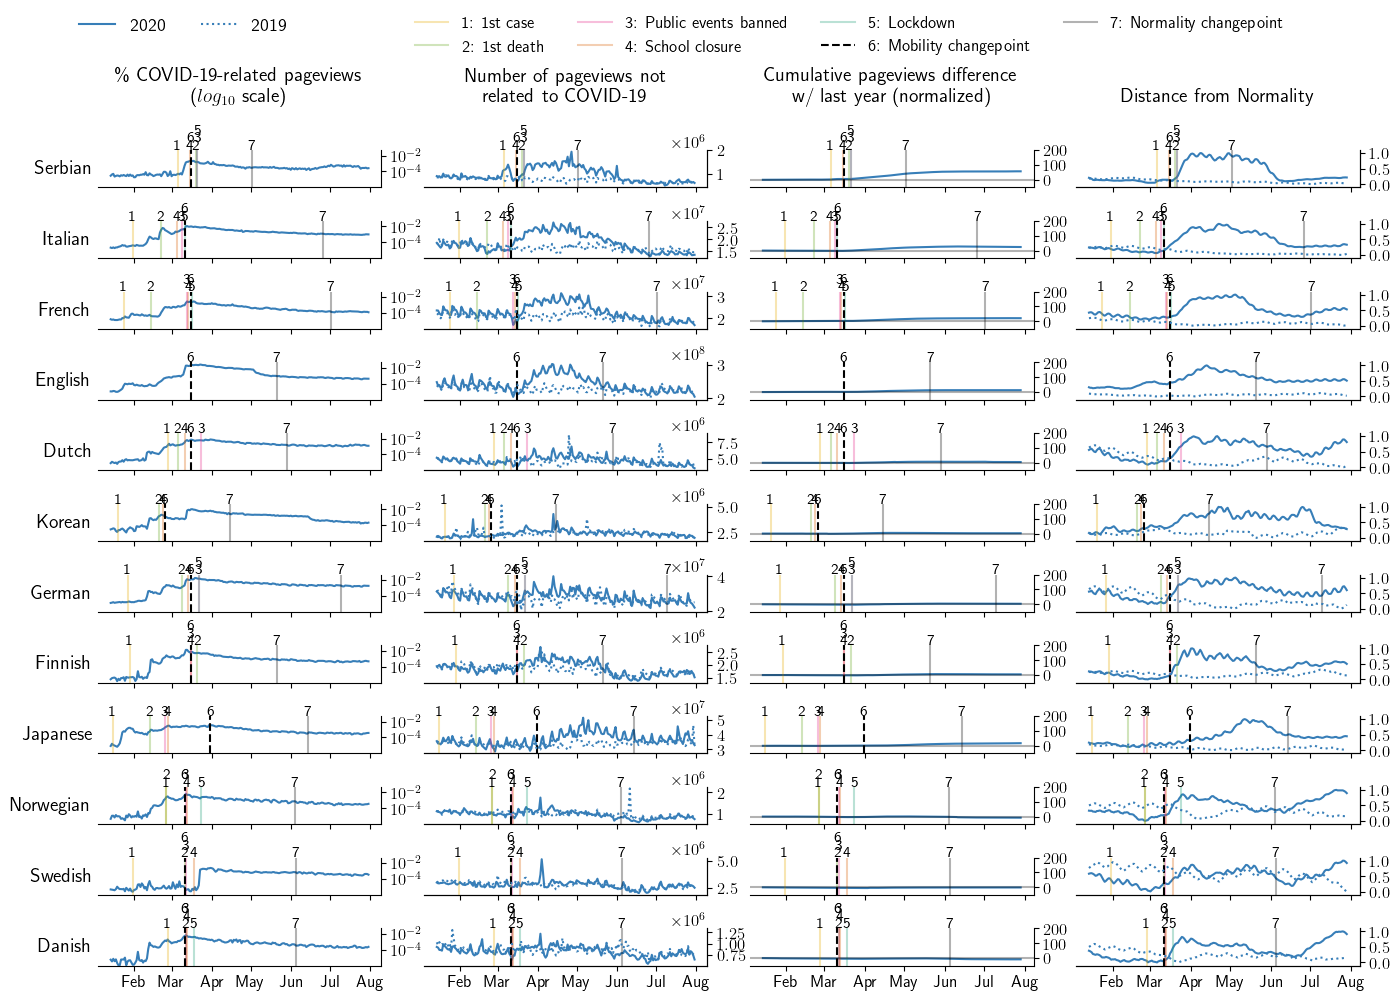

In [17]:
fig, axs = plt.subplots(12, 4,
                       figsize=(14, 10),
                       sharex=False,
                       gridspec_kw={"hspace": 0.9, "wspace": 0.15, "top": 0.7})

for idx, ax_ in enumerate(axs[:, :]):
    
    # COVID-RELATED PAGEVIEWS
    
    ax = ax_[0]
    
    code = codes_order[idx]
    ax.set_ylabel(helper_langs[code], rotation=0, ha="right", va="center", fontsize=14)
    start, end = plot_dates(ax, 20200114, 20200731, 
                            agg[code]["sum"].index,
                            (agg[code]["covid"]["sum"].values + agg[code + ".m"]["covid"]["sum"].values +1) 
                            / (agg[code]["sum"].values + agg[code+".m"]["sum"].values),  sci=False, color="#377eb8")

    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('right')
    ax.set_yscale("log")
    ax.set_ylim([10**(-6), 5* 10**(-2)])
    ax.set_yticks([10**(-4), 10**(-2)])
                
    # NON COVID-RELATED PAGEVIEWS
    
    ax = ax_[1]
    
    ax_twin = ax.twiny()

    start, end = plot_dates(ax, 20200114, 20200731, 
                        agg[code]["sum"].index, agg[code]["sum"].values + agg[code + ".m"]["sum"].values -
                        agg[code]["covid"]["sum"].values - agg[code +".m"]["covid"]["sum"].values, 
                            color="#377eb8", sci=False)
    
    plot_dates(ax_twin, 20190114, 20190731, agg[code]["sum"].index,
               agg[code]["sum"].values + agg[code + ".m"]["sum"].values -
               agg[code]["covid"]["sum"].values - agg[code +".m"]["covid"]["sum"].values,
               adjust=(start, end), sci=False, xticklabels=False, ls=":", color="#377eb8")
        

    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    
    for ax_t in [ax, ax_twin]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')

    # CUMULATIVE PAGE VIEWS DIFFERENCE
        
    ax = ax_[2]
    
    plot_cumm_diff(ax, (20190101, 20191231), [20190115, 20200114], [20190731, 20200729],
         agg[code]["sum"].index,
         agg[code]["sum"].values + agg[code + ".m"]["sum"].values -
         agg[code]["covid"]["sum"].values - agg[code +".m"]["covid"]["sum"].values
    )
    
    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    
    ax.set_ylim([-7.5, 15])
    ax.axhline(0, color="black", alpha=0.3)

    for ax_t in [ax]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')
    
    #if idx == 0:
    ax.set_ylim(-50,200)
    ax.set_yticks([0, 100, 200])
    
    #else:
    #    ax.set_ylim(-9,36)
    #    ax.set_yticks([0, 18, 36])
    
    # PCA SHIFT

    ax = ax_[3]
    
    ax_twin = ax.twiny()
    
    ts_2020, ts_2019 = get_attention_shift_ts(dfs_pca_shift[code], '2020-01-01', rolling=10)
    
    start, end = plot_dates(ax, 20200114, 20200729, ts_2020.index, ts_2020.values,  sci=False)

    plot_dates(ax_twin, 20200114, 20200729, ts_2019.index, ts_2019.values, 
                           adjust=(start, end), sci=False, xticklabels=False, ls=":", color="#377eb8")
    
    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)


    for ax_t in [ax, ax_twin]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')
        
    ax.set_ylim([-0.1,1.1])
    ax.set_yticks([0, 0.5, 1])
    
    for ax in ax_:
        if idx != 11:
            ax.set_xticklabels([])

axs[0,0].set_title("\% COVID-19-related pageviews \n ($log_{10}$ scale)", pad=35)
axs[0,1].set_title("Number of pageviews not\n related to COVID-19 ", pad=35)
axs[0,2].set_title("Cumulative pageviews difference \n w/ last year (normalized)", pad=35)
axs[0,3].set_title("Distance from Normality", pad=35)

lines = [
    Line2D([0], [0], color="#377eb8", lw=1.5, ls="-"),
    Line2D([0], [0], color="#377eb8", lw=1.5, ls=":"),
    Line2D([0], [0], color="black", lw=1.5, ls=":")
]

axs[0,0].legend(
    handles=lines,
    labels=["2020", "2019"],
    loc='upper center', bbox_to_anchor=(0.3, 5),
    ncol=3, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=13
)


lines_interv = [Line2D([0], [0], color=int_c[x], ls=int_ls[x], alpha=0.3 if x != "Mobility" else 1.) 
                for x, _ in interventions_helper.items()]

axs[0,1].legend(
    handles= lines_interv,
    labels=["{}: {}".format(v, 
                            k.replace("Mobility", "Mobility changepoint")\
                            .replace("Normalcy", "Normality changepoint"))
            for k, v in interventions_helper.items()],
    loc='upper center', bbox_to_anchor=(1.5, 5),
    ncol=4, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=12
)

set_size(fig, (14, 10))
fig.savefig("../images/pageviews.pdf", bbox_inches="tight")

---